In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa
import scipy as sp

In [ ]:
# import data
data_set = np.genfromtxt("hw09_data_set.csv", delimiter = ",")

In [ ]:
# retrieve B matrix
delta = 2.0
B = np.zeros((len(data_set[:, 0]), len(data_set[:, 0])))

for i in range(len(B[:, 0])):
  for j in range(len(B[0, :])):
    if i == j:
      B[i, j] = 0
    else:
      x1 = data_set[i]
      x2 = data_set[j]
      dist = np.linalg.norm(x1 - x2)
      if dist < delta:
        B[i, j] = 1

In [ ]:
# retrieve D matrix 

D = np.zeros((len(data_set[:, 0]), len(data_set[:, 0])))

for i in range(len(data_set[:, 0])):
  for j in range(len(data_set[:, 0])):
    if i == j:
      sum = np.sum(B[i])
      D[i, j] = sum

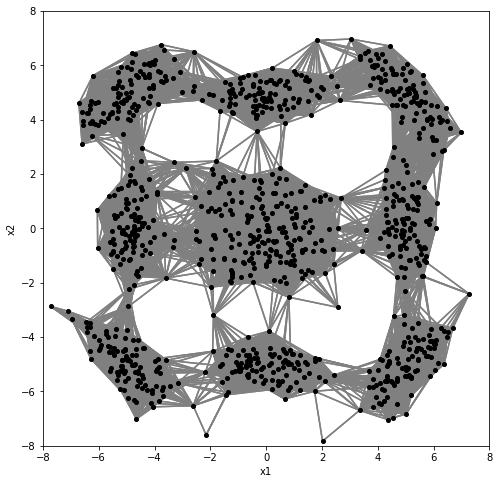

In [ ]:
# plot data and point connections based on the B matrix

plt.figure(figsize = (8, 8))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel("x1")
plt.ylabel("x2")

for i in range(len(data_set[:, 0])):
  for j in range(len(data_set[:, 0])):
    if B[i, j] != 0:
      first = data_set[i]
      second = data_set[j]
      plt.plot([first[0], second[0]], [first[1], second[1]], "k-", color = "gray")

for i in range(len(data_set[:, 0])):
  xi = data_set[i]
  plt.plot(xi[0], xi[1], marker = 'o', linestyle = "none", color = "black", markersize = 4)

In [ ]:
# retrieve the L_symmetric matrix

I = np.identity(len(data_set[:, 0]))
D_neg_half_power = sp.linalg.fractional_matrix_power(D, -0.5)

L_symmetric = I - np.matmul(np.matmul(D_neg_half_power, B), D_neg_half_power)

print("L_symmetric[0:5, 0:5]:")
print(L_symmetric[0:5, 0:5])

L_symmetric[0:5, 0:5]:
[[ 1.          0.         -0.01277024 -0.01689343 -0.01277024]
 [ 0.          1.         -0.01683588  0.          0.        ]
 [-0.01277024 -0.01683588  1.          0.         -0.01190476]
 [-0.01689343  0.          0.          1.          0.        ]
 [-0.01277024  0.         -0.01190476  0.          1.        ]]


In [ ]:
# find R smallest eigenvectors of L_symmetric matrix

R = 5

eigenvalues, eigenvectors = np.linalg.eig(L_symmetric)
eigenvectors = eigenvectors.T
Z = eigenvectors[np.argsort(eigenvalues)[1 : (R + 1)]].T

print("Z[0:5, 0:5]:")
print(Z[0:5, 0:5])

Z[0:5, 0:5]:
[[ 0.02492986 -0.03008423 -0.00946604  0.05116243  0.0229564 ]
 [ 0.01590745 -0.02367529 -0.00235798  0.037579    0.0141235 ]
 [ 0.02601003 -0.03273215 -0.00886993  0.05526008  0.02411414]
 [ 0.02147879 -0.02190107 -0.01054254  0.03633024  0.0175098 ]
 [ 0.02624211 -0.03262591 -0.00925994  0.05524827  0.02432336]]


In [ ]:
def update_centroids(memberships, X, N, K, R):
    if memberships is None:
        # initialize centroids for assuming K = 9 based on the row numbers defined in spec
        centroids = np.zeros((K, R))
        centroids[0] = X[242]
        centroids[1] = X[528]
        centroids[2] = X[570]
        centroids[3] = X[590]
        centroids[4] = X[648]
        centroids[5] = X[667]
        centroids[6] = X[774]
        centroids[7] = X[891]
        centroids[8] = X[955]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return centroids

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)

    return memberships

In [ ]:
# iterate over the learning algorithm to finalize class labels and final centroids
centroids = None
memberships = None
iteration = 0
K = 9
N = len(data_set)
while True:
    iteration += 1
    old_centroids = centroids
    centroids = update_centroids(memberships, Z, N, K, R)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break

centroids = update_centroids(memberships, data_set, N, K, R)

print("algorithm finished")
print("number of iterations: " + str(iteration))

algorithm finished
number of iterations: 5


Text(0, 0.5, 'x2')

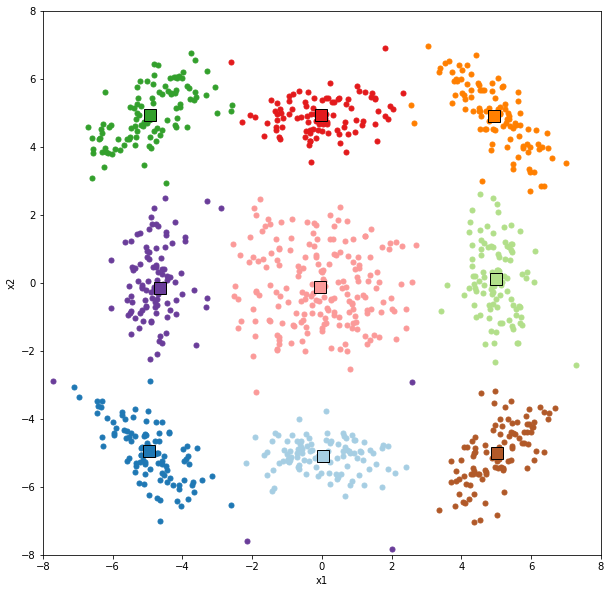

In [ ]:
# plot final data
plt.figure(figsize = (10, 10)) 
plt.xlim(-8, 8)
plt.ylim(-8, 8)
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                            "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

for c in range(K):
        plt.plot(data_set[memberships == c, 0], data_set[memberships == c, 1], ".", markersize = 10,
                  color = cluster_colors[c])
for c in range(K):
   plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
              markerfacecolor = cluster_colors[c], markeredgecolor = "black")
   
plt.xlabel("x1")
plt.ylabel("x2")